In [4]:
import numpy as np
import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from time import time

from common import *
from generate import *
from filter_kruskal import *

In [2]:
#common.run(args="--help")
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [3]:
args = f"--inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1"
df = common.run_benchmark(common.OUT_DIR / "timing_results.csv", args=args, print_output=True)
df

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/timing_results.csv --inputfile benchmark_data/barabasi_800_50pct.csv --mst-kernel 1 -s 1 -n 1
159705 Edges loaded

Benchmark results:
Initialize	µ=0.163603s	sigma=0s	median=0.163603s	total=0.163603	num_calls=1
Kruskal()	µ=0.00535719s	sigma=0s	median=0.00535719s	total=0.00535719	num_calls=1
filter()	µ=0.000802314s	sigma=0.000303693s	median=0.000602001s	total=0.00722082	num_calls=9
grow MST	µ=0.000396576s	sigma=0s	median=0.000396576s	total=0.000396576	num_calls=1
partition()	µ=0.000931001s	sigma=0.000183066s	median=0.000802739s	total=0.00837901	num_calls=9
sort()	µ=0.00492708s	sigma=0s	median=0.00492708s	total=0.00492708	num_calls=1
total	µ=0.184599s	sigma=0s	median=0.184599s	total=0.184599	num_calls=1


,tag,average,std_dev,median,total,num_calls
0,Initialize,0.163603,0.000000,0.163603,0.163603,1
1,Kruskal(),0.005357,0.000000,0.005357,0.005357,1
2,filter(),0.000802,0.000304,0.000602,0.007221,9
3,grow MST,0.000397,0.000000,0.000397,0.000397,1
4,partition(),0.000931,0.000183,0.000803,0.008379,9
5,sort(),0.004927,0.000000,0.004927,0.004927,1
6,total,0.184599,0.000000,0.184599,0.184599,1


In [4]:
run(args="--help")

Allowed options:
  -h [ --help ]                      produce help message
  -m [ --mst-kernel ] arg (=1)       Kernel used calculating MST. 0 = regular 
                                     kruskal, 1 = filter-kruskal
  -s [ --sort-kernel ] arg (=1)      Kernel used for sort() [int]
  -p [ --partition-kernel ] arg (=1) Kernel used for partition() [int]
  --pinned-memory                    use pinned memory (OFF by default)
  -f [ --filter-kernel ] arg (=0)    Kernel used for filter() [int]
  -c [ --compress-kernel ] arg (=1)  Kernel used for compress() [int]
  -r [ --recusion-depth ] arg (=32)  Kernel used for compress() [int]
  -n [ --repetitions ] arg (=1)      Number of times the MST calculation is 
                                     repeated [int]
  -i [ --inputfile ] arg             input file containing graph data. Filepath
                                     must be relative to Ex2/
  -t [ --ouputfile_timings ] arg     Output file for timings. Filepath must be 
             

In [5]:
whatever_runs = [{'n_nodes': 200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 3200, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 6400, 'density': '50pct', 'prefix':'all_one', 'flags':'-m 1 -s 1 -p 1 -f 1 -c 1 -r 1 -n 10'},
                {'n_nodes': 200, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 400, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 800, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'},
                {'n_nodes': 1600, 'density': '50pct', 'prefix':'all_zero', 'flags':'-m 0 -s 0 -p 0 -f 0 -c 0 -r 0 -n 10'}
                ]

n_nodes_list_d10 = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
n_nodes_list_d50 = [50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
n_nodes_list_d90 = [25, 50, 100, 200, 400, 800, 1600, 3200, 6400]

def get_run_list(n_nodes_list, density, prefix, flags, reps_standard=10, reps_last=3):
    run_list = []
    for n_nodes in n_nodes_list[:-1]:
        run_list.append({'n_nodes': n_nodes, 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_standard}'})
    # fewer repetitions on the biggest graph
    run_list.append({'n_nodes': n_nodes_list[-1], 'density': density, 'prefix': prefix, 'flags': flags + f' -n {reps_last}'})
    return run_list


#define SORT_KERNEL_GPU_BUBBLE_MULT 0
#define SORT_KERNEL_MERGE_SORT 1
#define SORT_KERNEL_THRUST 2
#define SORT_KERNEL_RADIX 3

#define PARTITION_KERNEL_CPU_NAIVE 0
#define PARTITION_KERNEL_GPU 1
#define PARTITION_KERNEL_STREAMS 2
#define PARTITION_KERNEL_THRUST 3

#define FILTER_KERNEL_CPU_NAIVE 0
#define FILTER_KERNEL_GPU 1
#define FILTER_KERNEL_THRUST 2

#define COMPRESS_NOTHING 0
#define COMPRESS_KERNEL_CPU_NAIVE 1
#define COMPRESS_KERNEL_GPU 2
#define COMPRESS_KERNEL_GPU_LIMITED 3

"""
-m ... 0 : regular kruskal, 1 : filter kruskal
-s ... 2 : thrust sort, 3 : radix sort
-p ... 0 : partition cpu, 1 : partition gpu, 2 : partition thrust
-f ... 0 : filter cpu, 1 : filter gpu, 2 : filter thrust

--pinned-memory 
"""

# compare thrust sort with radix sort
regK_thrustsort_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_thrustsort', '-m 0 -s 2')
regK_thrustsort_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_thrustsort', '-m 0 -s 2')

regK_radix_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'regK_radix', '-m 0 -s 3')
regK_radix_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regK_radix', '-m 0 -s 3')


# compare filter methods (sort: radix, partition: gpu, filter: varies, compress: cpu)
filK_gpu_filter_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'gpu_filter', '-m 1 -f 1 -p 0 -s 3') # this does not work - looks like segfault at size 400+ 
filK_cpu_filter_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'cpu_filter', '-m 1 -f 0 -p 0 -s 3') 


# compare partition methods (sort: radix, partition: varies, filter: cpu, compress: cpu)
filK_gpu_partition_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'gpu_partition', '-m 1 -f 0 -p 0 -s 3')
filK_cpu_partition_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'gpu_partition', '-m 1 -f 0 -p 1 -s 3')



# regular kruskal radix sort (partition: gpu, filter: gpu, compress: cpu)
regK_radix_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regk_radix', '-m 0 -p 1 -s 3')
regK_thrustsort_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'regk_thrustsort', '-m 0 -s 2')


thrust_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'thrust', '-s 2 -p 3 -f 2')
thrust_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'thrust', '-s 2 -p 3 -f 2')
thrust_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'thrust', '-s 2 -p 3 -f 2')

gpu_radix_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'radix', '-s 3 -p 1 -f 1')




filter_kruskal_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filter_kruskal', '')
filter_kruskal_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filter_kruskal', '')
filter_kruskal_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filter_kruskal', '')

regular_kruskal_runs_d10 = get_run_list(n_nodes_list_d10, '10pct', 'filter_kruskal', '-m 0')
regular_kruskal_runs_d50 = get_run_list(n_nodes_list_d50, '50pct', 'filter_kruskal', '-m 0')
regular_kruskal_runs_d90 = get_run_list(n_nodes_list_d90, '90pct', 'filter_kruskal', '-m 0')




In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d50)

In [ ]:
do_benchmark_runs(regK_thrustsort_runs_d50)

In [ ]:
do_benchmark_runs(regK_radix_runs_d50)

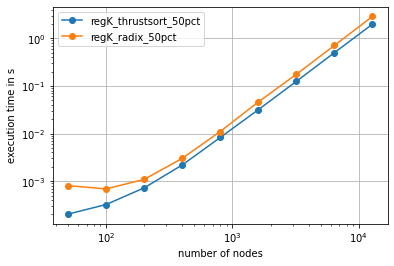

In [35]:
plot_lines(regK_thrustsort_runs_d50 + regK_radix_runs_d50)
plt.savefig(common.OUT_DIR / "radix_vs_thrustsort_d50.png", dpi=200)


In [31]:
do_benchmark_runs(filk_cpu_filter_runs_d50) # try with cpu partition

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 1 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 1 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 1 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_400_50pct.csv --inputfile benchmark_data/barabasi_400_50

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_400_50pct.csv', '--inputfile', 'benchmark_data/barabasi_400_50pct.csv', '-m', '1', '-f', '1', '-p', '0', '-s', '3', '-n', '10']' died with <Signals.SIGSEGV: 11>.

In [25]:
do_benchmark_runs(filk_cpu_filter_runs_d50) # original with gpu partition

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 1 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_400_50pct.csv --inputfile benchmark_data/barabasi_400_50

CalledProcessError: Command '['/home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2', '--ouputfile_timings', '/home/student1/workspace/simon/GPU_ArchComp/Ex2/out/cpu_filter_400_50pct.csv', '--inputfile', 'benchmark_data/barabasi_400_50pct.csv', '-m', '1', '-f', '1', '-p', '1', '-s', '3', '-n', '10']' died with <Signals.SIGSEGV: 11>.

In [ ]:
do_benchmark_runs(filter_kruskal_runs_d10)

In [ ]:
do_benchmark_runs(filter_kruskal_runs_d50)

In [ ]:
do_benchmark_runs(filter_kruskal_runs_d90)

In [ ]:
do_benchmark_runs(regular_kruskal_runs_d10)

In [ ]:
do_benchmark_runs(regular_kruskal_runs_d50)

In [ ]:
do_benchmark_runs(regular_kruskal_runs_d90)

In [ ]:
do_benchmark_runs(thrust_runs_d10)

In [ ]:
do_benchmark_runs(thrust_runs_d50)

In [ ]:
do_benchmark_runs(thrust_runs_d90)

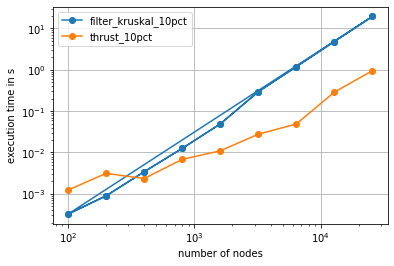

In [16]:
plot_lines(regular_kruskal_runs_d10 + filter_kruskal_runs_d10 + thrust_runs_d10)
plt.savefig(common.OUT_DIR / "lines1.png", dpi=200)


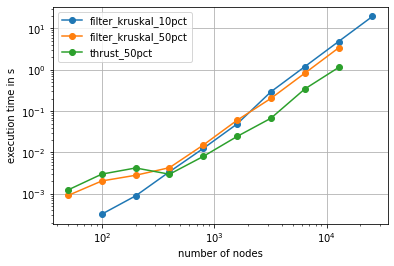

In [17]:
plot_lines(regular_kruskal_runs_d50 + filter_kruskal_runs_d50 + thrust_runs_d50)
plt.savefig(common.OUT_DIR / "lines1.png", dpi=200)


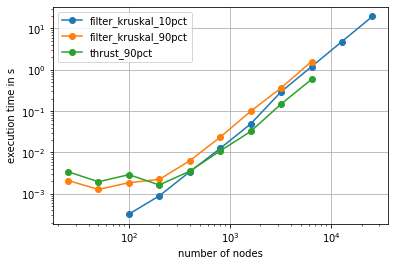

In [18]:
plot_lines(regular_kruskal_runs_d90 + filter_kruskal_runs_d90 + thrust_runs_d90)
plt.savefig(common.OUT_DIR / "lines1.png", dpi=200)

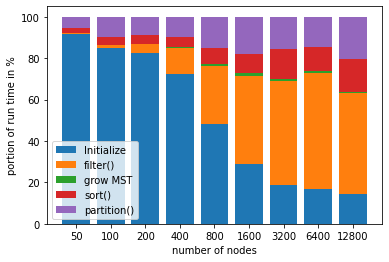

In [19]:
stacked_bars(filter_kruskal_runs_d50)
plt.savefig(common.OUT_DIR / "bars_filter_kruskal_d50.png", dpi=200)


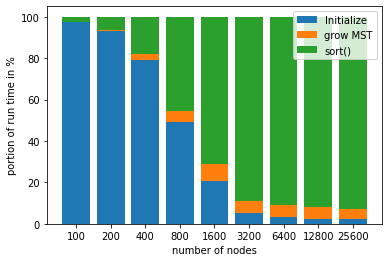

In [20]:
stacked_bars(regular_kruskal_runs_d50, regular_kruskal=True)
plt.savefig(common.OUT_DIR / "bars_regular_kruskal_d50.png", dpi=200)


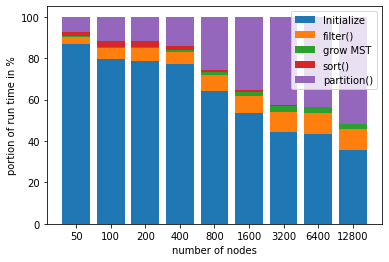

In [21]:
stacked_bars(thrust_runs_d50)
plt.savefig(common.OUT_DIR / "bars_thrust_d50.png", dpi=200)


[50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]


dict_keys(['Initialize', 'filter()', 'grow MST', 'sort()', 'partition()'])

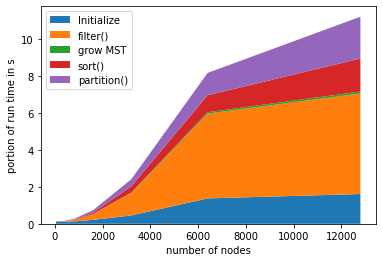

In [22]:

labels, stack = collect_for_stack(filter_kruskal_runs_d50)
print(labels)
stack
plt.stackplot(labels,stack['Initialize'],stack['filter()'], stack['grow MST'], stack['sort()'], stack['partition()'], labels=stack.keys())
plt.legend(loc='upper left')
plt.xlabel('number of nodes')
plt.ylabel('portion of run time in s')
stack.keys()

In [6]:
do_benchmark_runs(filK_gpu_partition_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 0 -p 0 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_400_50pct.csv --inputfile benchmark_data/bar

In [7]:
do_benchmark_runs(filK_cpu_partition_runs_d50)

Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_50_50pct.csv --inputfile benchmark_data/barabasi_50_50pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_100_50pct.csv --inputfile benchmark_data/barabasi_100_50pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_200_50pct.csv --inputfile benchmark_data/barabasi_200_50pct.csv -m 1 -f 0 -p 1 -s 3 -n 10
Running benchmark with ./home/student1/workspace/simon/GPU_ArchComp/Ex2/build/src/ex2 --ouputfile_timings /home/student1/workspace/simon/GPU_ArchComp/Ex2/out/gpu_partition_400_50pct.csv --inputfile benchmark_data/bar

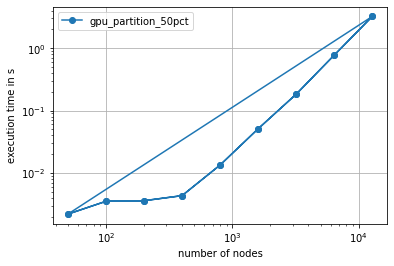

In [8]:
plot_lines(filK_cpu_partition_runs_d50 + filK_gpu_partition_runs_d50)
